## Overview of Imbalanced Classification


## Prepare the Data for Modeling

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('../df_clean_v2_b_wt_fixed.csv')
df = df.dropna()
df = df.drop(['yod', 'yoa'], axis=1)
# df = pd.read_csv('../df_clean.csv')
# df = df.dropna()
# df = df.drop(['yod','yoa','b_wt'], axis=1)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
datatypes = {'age':'int8', 'sex':'category', 'ethnic':'category', 'pt_state':'category', 'raceethn':'category', 
             'campus':'category', 'admtype':'category', 'payer':'category', 'pay_ub92':'category', 
             'provider':'category', 'asource':'category', 'moa':'category', 'service':'category', 'diag_adm':'category', 
             'los':'int8', 'los_binary':'category', 'b_wt':'int16'}

In [11]:
df = df.astype(datatypes)

In [12]:
df.head()

,age,sex,b_wt,ethnic,pt_state,raceethn,campus,admtype,payer,pay_ub92,provider,asource,moa,service,diag_adm,los,los_binary
426022,60,b'2',0,2.0,RI,b'1',b'0',b'3',b'5',6.0,b'7201',b'1',1.0,b'58',715,2,0
426023,78,b'1',0,2.0,Other,b'2',b'0',b'3',b'0',1.0,b'7201',b'1',1.0,b'62',000,1,0
426024,83,b'2',0,2.0,RI,b'1',b'0',b'3',b'0',1.0,b'7201',b'1',12.0,b'58',715,4,0
426025,60,b'1',5276,2.0,RI,b'1',b'0',b'3',b'5',6.0,b'7201',b'1',1.0,b'58',715,3,0
426026,30,b'2',6000,3.0,Other,b'9',b'0',b'3',b'B',10.0,b'7201',b'1',1.0,b'77',000,4,0


In [13]:
df.dtypes

age               int8
sex           category
b_wt             int16
ethnic        category
pt_state      category
raceethn      category
campus        category
admtype       category
payer         category
pay_ub92      category
provider      category
asource       category
moa           category
service       category
diag_adm      category
los               int8
los_binary    category
dtype: object

In [14]:
from sklearn import preprocessing
df['age'] = preprocessing.scale(df['age'])
df['moa'] = preprocessing.scale(df['moa'])
df['b_wt'] = preprocessing.scale(df['b_wt'])

In [15]:
X = df.drop(['los','los_binary'], axis=1)
X = pd.get_dummies(X)
y = df['los_binary']

## Model functions

In [3]:
from numba import jit, cuda

In [4]:
@jit(target='cuda')
def log_model(x_train, y_train, x_test, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    # Accuracry on training data
    print('Training Accuracy:', model.score(x_train, y_train))

    # Prediction and accuracy on testing data
    y_pred = model.predict(x_test)

    [tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
    d = pd.DataFrame({'Model':model,
                        'Sensitivity':[tp/(tp+fn)],
                         'Specificity':[tn/(tn+fp)],
                         'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                          'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

    return d

## Split the data to train and test data



## Imbalanced Dataset

We explore the target variable to see how unbalanced the data is.  It can be seen that the data is severely unbalanced. Thus, the data is imbalanced. 


In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

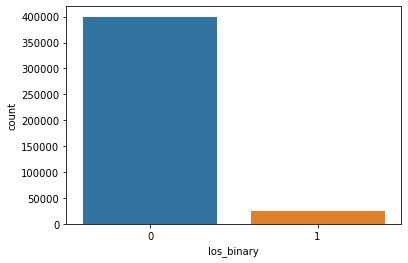

In [46]:
ax = sns.countplot(y_train)

## Model on Imbalanced Data

We investigate how well models perform on imbalanced data. 

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)

In [ ]:
# Create a decision tree and train
model = LogisticRegression()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)

[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
#     d = pd.DataFrame({'Model':['Decision Tree','Decision Tree','Decision Tree','Decision Tree'],
#                     'Metrics':['Sensitivity','Specificity','Balanced Accuracy','Accuracy'],
#                      'Values':[tp/(tp+fn), tn/(tn+fp), .5*(tp/(tp+fn) + tn/(tn+fp)), (tp+tn)/(tp+tn+fp+fn)]})
    
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  
d

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy: 0.9410649401472726


## Balance the data

Since models suffered greatly with imbalanced data.  We need to balance the data to improve model performances. An easy way to balance the data is Random Undersampling (RUS), which is randomly remove observations so that the two classes are balanced. 

### Random undersampling

In [16]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)
x_train, y_train = rus.fit_resample(x_train, y_train)

In [ ]:
ax = sns.countplot(y_train)

## Rerun models on balanced data

In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
#     d = pd.DataFrame({'Model':['Decision Tree','Decision Tree','Decision Tree','Decision Tree'],
#                     'Metrics':['Sensitivity','Specificity','Balanced Accuracy','Accuracy'],
#                      'Values':[tp/(tp+fn), tn/(tn+fp), .5*(tp/(tp+fn) + tn/(tn+fp)), (tp+tn)/(tp+tn+fp+fn)]})
    
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,LogisticRegression(),0.709176,0.797058,0.753117,0.791711


### Oversampling

In [23]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)

In [25]:
x_train, y_train = over_sampler.fit_resample(x_train, y_train)

MemoryError: Unable to allocate 11.0 GiB for an array with shape (1827, 807482) and data type float64

In [ ]:
ax = sns.countplot(y_train)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()

d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

So also not great

## Other undersampling
Neither actually finished...

In [26]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

cc_x_train, cc_y_train = cc.fit_resample(x_train, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-29fca97baaed>", line 6, in <module>
    cc_x_train, cc_y_train = cc.fit_resample(x_train, y_train)
  File "D:\Anaconda3\lib\site-packages\imblearn\base.py", line 83, in fit_resample
    output = self._fit_resample(X, y)
  File "D:\Anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_generation\_cluster_centroids.py", line 172, in _fit_resample
    self.estimator_.fit(X[y == target_class])
  File "D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 1055, in fit
    n_threads=self._n_threads)
  File "D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 406, in _kmeans_single_elkan
    x_squared_norms=x_squared_norms)
  File "D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 722, in _init_centroids
    x_squared_norms=x_squared_nor

TypeError: object of type 'NoneType' has no len()

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
ENN = EditedNearestNeighbours()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

ENN_x_train, ENN_y_train = ENN.fit_resample(x_train, y_train)

## Other Models

In [ ]:
from sklearn.metrics import r2_score
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)
x_train, y_train = rus.fit_resample(x_train, y_train)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
 
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create a decision tree and train
model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()

In [ ]:
d = pd.DataFrame({'Model':['AdaBooster'],
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                     'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

### KNeighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
 
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,KNeighborsClassifier(),0.71423,0.754968,0.734599,0.75249


### GradientBoosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()

In [19]:
d = pd.DataFrame({'Model':['GradientBoostingClassifier'],
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,GradientBoostingClassifier,0.695956,0.816277,0.756117,0.808956


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()

In [21]:
d = pd.DataFrame({'Model':['RandomForest'],
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,RandomForest,0.74339,0.763482,0.753436,0.76226


In [ ]:
model[0]

| Model | Sensitivity | Specificity | Balanced Accuracy | Accuracy |
| --- | --- | --- | --- | --- |
| LogisticRegression | 0.709321 | 0.770516 | 0.739919 | 0.766871|
| DecisionTreeClassifier | 0.682917 | 0.692148 | 0.687533 | 0.6916 |
| AdaBoostClassifier | 0.718193 | 0.773245 | 0.745719 | 0.769976 |
| KNeighborsClassifier | 0.64845 | 0.756638 | 0.702544 | 0.750071 |
| GradientBoostingClassifier | 0.699225 | 0.806062 | 0.752643 | 0.799576 |
| RandomForestClassifier | 0.74186 | 0.738001 | 0.739931 | 0.738235 |

#### Questions:
* Why do some model types have lists? (Adaboost, GradientBoost, RandomForest)
* What exactly does Tuning do?
* Do we care about how long it takes for a model to run?
* What's comnsidered good values?
* Is there a weighted summmary statistic for the four measures? Go off Balanced accuracy and maybe running time

auc

#### Comments:
* Now I can't get oversampling to run at all
* Undersampling also won't finish (can this have convergence issues? feels like it should be easy calculations)
    * Other undersampling options?
* GPU processing is more complicated than I thought (only certain things supported, pandas requires complete rewriting, having trouble finding anything for imblearn)
    * [helpful link](https://towardsdatascience.com/how-to-use-gpus-for-machine-learning-with-the-new-nvidia-data-science-workstation-64ef37460fa0)
    * Could be useful, but unless you also have a nvidia gpu you'd like to use, code review would be difficult
* Next steps?

#### Notes:
* In package imblearn, there should be more methods of undersampling
* Look into imblearn.ensemble
* Tuning maybe, but new way of improving models